In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib
#import sklearn.externals.six 
#import StringIO  
import IPython.display 
#import Image  
import sklearn.tree 
#import export_graphviz
import pydotplus
import os

In [2]:
dataset = pd.read_csv("lv2.csv")
print(dataset.shape)

(269643, 36)


In [3]:
print(dataset.groupby('Label').size())

Label
Benign        19807
Malicious    249836
dtype: int64


In [4]:
null = dataset.isnull()
print(dataset.isnull().any().any())
print(null.sum())
dataset['ResponseTimeTimeMedian'] = dataset['ResponseTimeTimeMedian'].fillna(0)
dataset['ResponseTimeTimeSkewFromMedian'] = dataset['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataset.isnull()
print("New: ", dataset.isnull().any().any())
print("New: ", null.sum())

True
Unnamed: 0                                  0
SourceIP                                    0
DestinationIP                               0
SourcePort                                  0
DestinationPort                             0
TimeStamp                                   0
Duration                                    0
FlowBytesSent                               0
FlowSentRate                                0
FlowBytesReceived                           0
FlowReceivedRate                            0
PacketLengthVariance                        0
PacketLengthStandardDeviation               0
PacketLengthMean                            0
PacketLengthMedian                          0
PacketLengthMode                            0
PacketLengthSkewFromMedian                  0
PacketLengthSkewFromMode                    0
PacketLengthCoefficientofVariation          0
PacketTimeVariance                          0
PacketTimeStandardDeviation                 0
PacketTimeMean               

In [5]:
dataset.columns
cols = dataset.drop(labels = ['Unnamed: 0','TimeStamp'], axis = 1)
cols.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived',
       'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [6]:
array = cols.values
X = array[:,0:33]
Y = array[:,33]
print(X)
#Y = Y.astype('string')
validation_size = 0.30
seed = 78
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


[[19216820191.0 176103000000.0 50749 ... 0.071186682 0.024714815
  1.174947648]
 [19216820191.0 176103000000.0 50749 ... 0.293297421 -0.07584524
  1.402381756]
 [19216820191.0 176103000000.0 50749 ... 0.248063714 0.085061157
  0.958347923]
 ...
 [1111.0 19216820207.0 443 ... 0.222679202 0.082236938 9.778680762]
 [1111.0 19216820207.0 443 ... 0.935545044 0.819613331 0.744731879]
 [1111.0 19216820207.0 443 ... 0.599889169 0.283842691 2.538491718]]


In [7]:
X_train.shape

(188750, 33)

In [8]:
scoring = 'accuracy'
print(scoring)
X_test.shape

accuracy


(80893, 33)

In [9]:
models = []
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))

print(models)

[('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())]


In [10]:
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

[0.99960265 0.99952318 0.99968212 0.99962914 0.99936424]
ETC Accuracy: 0.999560 (+/- 0.000111)
[0.99989404 0.99986755 0.99992053 0.99986755 0.99986755]
RFC Accuracy: 0.999883 (+/- 0.000021)


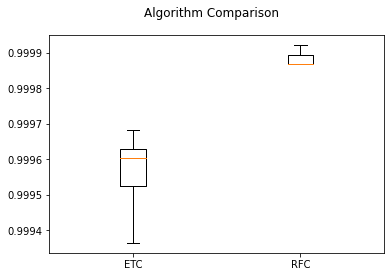

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ETC Accuracy test set result
0.9994684336098303
ETC accuracy test:
 0.9994684336098303

Confusion Matrix:
 [[ 5912    25]
 [   18 74938]]

Classfication report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5937
   Malicious       1.00      1.00      1.00     74956

    accuracy                           1.00     80893
   macro avg       1.00      1.00      1.00     80893
weighted avg       1.00      1.00      1.00     80893



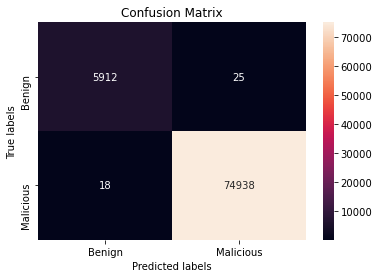

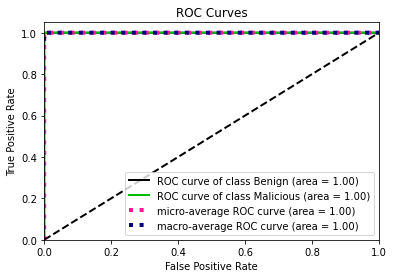

Validating Feature importance
[0.0052389  0.04991634 0.01416548 0.00962018 0.06650953 0.01666443
 0.02584461 0.0113668  0.01564325 0.04294922 0.06359474 0.05078103
 0.04202653 0.0854351  0.02578436 0.03044851 0.05336847 0.05459293
 0.0580383  0.028515   0.03933994 0.00371047 0.02798633 0.01052053
 0.01881497 0.00894158 0.01424426 0.01328664 0.0107411  0.00683885
 0.04585433 0.03909095 0.01012634]


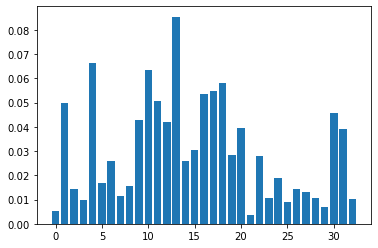

<AxesSubplot:>

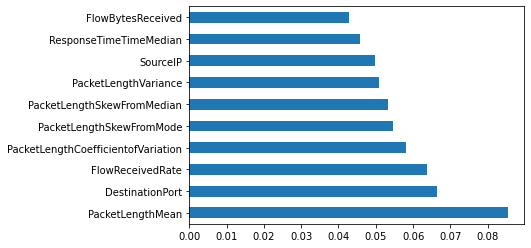

In [12]:
print("ETC Accuracy test set result")
etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(etc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_etc = etc.predict(X_test)
print("ETC accuracy test:\n",accuracy_score(Y_test, predictions_etc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_etc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_etc))

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
cf_matrix=confusion_matrix(Y_test, predictions_etc)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malicious']); ax.yaxis.set_ticklabels(['Benign', 'Malicious']);
cf_matrix=confusion_matrix(Y_test, predictions_etc)

import scikitplot as skplt #to make things easy
y_pred_proba = etc.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_pred_proba)
plt.show()

print ("Validating Feature importance")
#fit an Extra Trees model to the data
test_model = ExtraTreesClassifier()
test_model.fit(X_train, Y_train)
#display the relative importance of each attribute
print(test_model.feature_importances_)
#plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:33])
feat_importances.nlargest(10).plot(kind='barh')

RFC result 30% test set
0.999740397809452
RFC accuracy test:
 0.999740397809452

Confusion Matrix:
 [[ 5926    11]
 [   10 74946]]

Classfication report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5937
   Malicious       1.00      1.00      1.00     74956

    accuracy                           1.00     80893
   macro avg       1.00      1.00      1.00     80893
weighted avg       1.00      1.00      1.00     80893



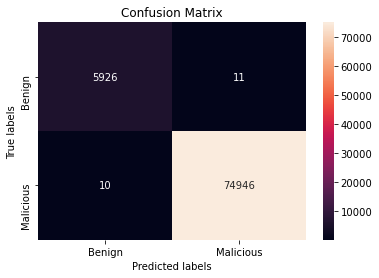

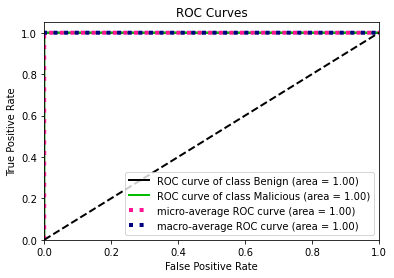

Validating Feature importance
[0.00524983 0.08414582 0.0160762  0.00294655 0.05003801 0.03981267
 0.03895552 0.06333807 0.01988888 0.0274259  0.02998648 0.03607925
 0.04997242 0.17682448 0.0115332  0.01693966 0.01738703 0.06421351
 0.05956911 0.05004644 0.04095987 0.00241458 0.01609994 0.0069108
 0.01647511 0.00369442 0.00945774 0.00907269 0.01567006 0.00363365
 0.00521182 0.00409885 0.00587147]


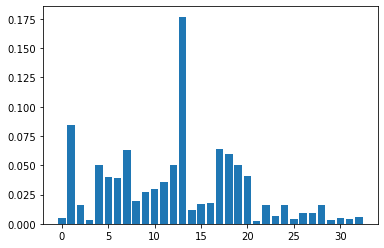

<AxesSubplot:>

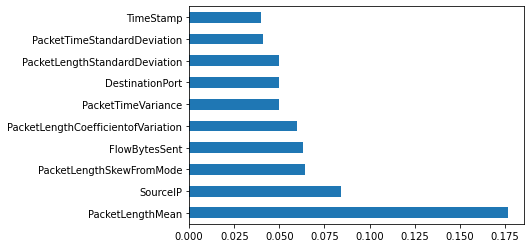

In [13]:
print("RFC result 30% test set")
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(rfc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_rfc = rfc.predict(X_test)
print("RFC accuracy test:\n",accuracy_score(Y_test, predictions_rfc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_rfc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_rfc))

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
cf_matrix=confusion_matrix(Y_test, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malicious']); ax.yaxis.set_ticklabels(['Benign', 'Malicious']);
cf_matrix=confusion_matrix(Y_test, predictions_rfc)

import scikitplot as skplt #to make things easy
y_pred_proba = rfc.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_pred_proba)
plt.show()

print ("Validating Feature importance")
# fit an Extra Trees model to the data
test_model = RandomForestClassifier()
test_model.fit(X_train, Y_train)
# display the relative importance of each attribute
print(test_model.feature_importances_)
# plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()
#
df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:33])
feat_importances.nlargest(10).plot(kind='barh')